In [1]:
import os, sys
sys.path.append(os.path.abspath(".."))
import nbimporter

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from preprocessing.feature_engineering import Preprocessor

from sklearn.model_selection import ParameterGrid
from scipy import stats

In [3]:
df = pd.read_csv('../data/mall_customers.csv')
preprocessor = Preprocessor(df)
preprocessed_df = preprocessor.transform()

In [10]:
dbscan_model = DBSCAN(eps=.5, min_samples=4)
preprocessed_df['Cluster'] = dbscan_model.fit_predict(preprocessed_df)

In [14]:
silhouette_score(preprocessed_df, preprocessed_df['Cluster'])

0.5640374559110106

In [ ]:
#Find best parameters
param_grid = {'min_samples':[3, 4, 5, 6],
            'eps':np.arange(0.1, 1, 0.05)}
best_score = -1
for params in ParameterGrid(param_grid):
    db = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    labels = db.fit_predict(preprocessed_df)
    if len(set(labels))>1 :
        score = silhouette_score(preprocessed_df, labels)
        if score > best_score:
            best_score = score
            best_params = params
best_params

{'eps': 0.40000000000000013, 'min_samples': 3}

In [13]:
dbscan_model = DBSCAN(eps= 0.9, min_samples= 3)
preprocessed_df['Cluster'] = dbscan_model.fit_predict(preprocessed_df)

In [15]:
silhouette_score(preprocessed_df, preprocessed_df['Cluster'])

0.5640374559110106

As the chart shows, DBSCAN did not perform well on this dataset and considered many points as outliers (cluster -1) because the data density is not uniform

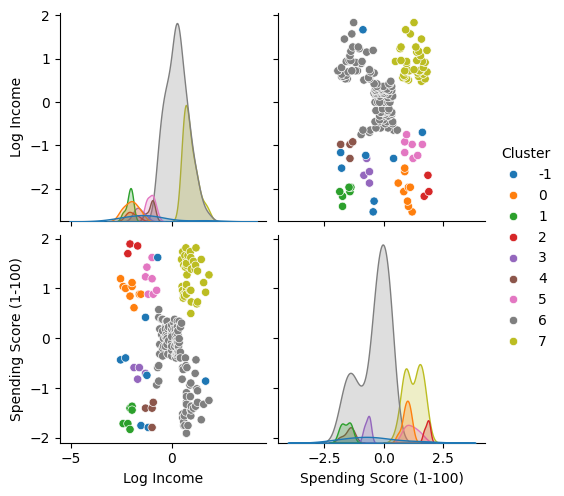

In [17]:
sns.pairplot(preprocessed_df, hue="Cluster", palette="tab10")